In [65]:
#################################################### PART.A
#Tensorflow library v1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#Reading the movies dataset
movies_df = pd.read_csv('/Users/Amin/Documents/movies.csv', header = None)

#Reading the ratings dataset
ratings_df = pd.read_csv('/Users/Amin/Documents/ratings.csv', header = None)

movies_df.columns = ['MovieID', 'Title', 'Genres']
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

movies_df = movies_df.drop([0])
movies_df.reset_index(drop=True, inplace=True)
# first 5 of movies
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
#last 5 of movies
movies_df.tail()

,MovieID,Title,Genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [67]:
ratings_df = ratings_df.drop([0])
ratings_df.reset_index(drop=True, inplace=True)
#First 5 Ratings
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
#Last 5 ratings
ratings_df.tail()

,UserID,MovieID,Rating,Timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [69]:

movies_df.shape

(9742, 3)

In [70]:
# Ratings data Shaoe
ratings_df.shape

(100836, 4)

In [71]:
#Create column "List Index"
movies_df['List Index'] = movies_df.index
movies_df.head()

,MovieID,Title,Genres,List Index
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,4


In [72]:
#################################################### PART.B
#Merge DataSets
merged_df=movies_df.merge(ratings_df, on='MovieID')

In [73]:
merged_df.head()

,MovieID,Title,Genres,List Index,UserID,Rating,Timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,17,4.5,1305696483


In [74]:
#################################################### PART.C
# droping unwanted columns 
merged_df = merged_df.drop('Timestamp', axis = 1).drop('Title', axis = 1).drop('Genres', axis = 1)

merged_df.head()

,MovieID,List Index,UserID,Rating
0,1,0,1,4.0
1,1,0,5,4.0
2,1,0,7,4.5
3,1,0,15,2.5
4,1,0,17,4.5


In [75]:
#################################################### PART.D
# grouping by UserID
userGroup = merged_df.groupby('UserID')
userGroup.first().head()

,MovieID,List Index,Rating
UserID,,,
1,1,0,4.0
10,296,257,1.0
100,3,2,3.5
101,223,190,4.0
102,3,2,5.0


In [78]:
#################################################### PART.E
#Count of users in training
UsedUsers = 1000

train_X = []

for userID, curUser in userGroup:
    temp = [0]*len(movies_df)
    for num, movie in curUser.iterrows():
        #Divide by 5 to Normalize then store
        temp[movie['List Index']] = float(movie['Rating'])/5.0
    
    train_X.append(temp)
    #training amount added or not
    if UsedUsers == 0:
        break
    UsedUsers -= 1
    




In [79]:
#################################################### PART.F
hiddenUnits = 20 
visibleUnits = len(movies_df)
vb = tf.placeholder("float", [visibleUnits]) #Count of unique movies
hb = tf.placeholder("float", [hiddenUnits]) #Count of features 
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

In [80]:
#create visible and hidden layer units and set their activation function with sigmoid and relu functions 

In [81]:
#Input Preprocessing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

#Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [82]:
#Rbm training parameters

In [83]:
#learning rate
alpha = 0.1
#Gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)

#Calculate contrastive divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

#Create methods to update the weights and biases
update_w = W + alpha*CD
update_vb = vb + alpha*tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha*tf.reduce_mean(h0 - h1, 0)

In [84]:
#Set error function - MSE
err = v0 - v1
err_sum = tf.reduce_mean(err*err)

In [85]:
#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())


0.3976148
0.32536286
0.2710497
0.23288001
0.18816066
0.1568857
0.12977919
0.10995163
0.0931578
0.081718236
0.07188674
0.064838976
0.05963376
0.055109594
0.05136182
0.048449032
0.04607109
0.04423375
0.04264587
0.041051622


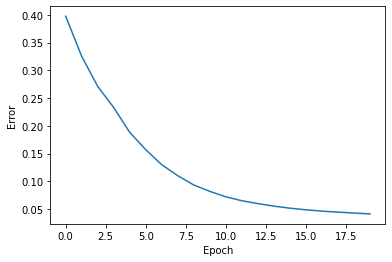

In [86]:
#################################################### PART.G

#Train RBM with 20 epochs
epochs = 20
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(train_X), batchsize), range(batchsize, len(train_X), batchsize)):
        batch = train_X[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: train_X, W: cur_w, vb: cur_vb, hb: cur_nb}))
    print (errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [87]:
# We can now predict movies that a selected user might like by feeding in the user's watched movie preferences
#into the RBM and then reconstructing the input. 

In [88]:
#################################################### PART.H

#Selecting random user 27
inputUser = [train_X[27]]

In [89]:
#Feeding in the user and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})

In [90]:
#15 most recommended movies for user 27 by RBM model
scored_movies_df_s = movies_df
scored_movies_df_s["Recommendation Score"] = rec[0]
scored_movies_df_s.sort_values(["Recommendation Score"], ascending=False).head(15)

,MovieID,Title,Genres,List Index,Recommendation Score
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,257,1.000000
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,277,1.000000
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,314,1.000000
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1939,0.999683
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,510,0.999587
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,224,0.658822
97,110,Braveheart (1995),Action|Drama|War,97,0.531372
461,527,Schindler's List (1993),Drama|War,461,0.517449
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,418,0.503866
3638,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,3638,0.481299
